In [2]:
import pandas as pd
data=pd.read_csv('/content/PlayTennis.csv')
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [13]:

from sklearn.preprocessing import LabelEncoder
outlook=LabelEncoder()
temp=LabelEncoder()
humidity=LabelEncoder()
wind=LabelEncoder()
play=LabelEncoder()
data['Outlook']=outlook.fit_transform(data['Outlook'])
data['Temperature']=outlook.fit_transform(data['Temperature'])
data['Humidity']=outlook.fit_transform(data['Humidity'])
data['Wind']=outlook.fit_transform(data['Wind'])
data['Play Tennis']=outlook.fit_transform(data['Play Tennis'])
data




,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [17]:
# Define feature columns correctly
feature_cols = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Extract features (X) and target variable (y)
x = data[feature_cols]
y = data['Play Tennis']  # Correct column name

# Print results
print(x)
print()
print(y)


    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)


In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
classifier.predict(x_test)

array([0, 1, 0])

In [21]:
x_test

,Outlook,Temperature,Humidity,Wind
6,0,0,1,0
12,0,1,1,1
7,2,2,0,1


In [22]:
y_test

,Play Tennis
6,1
12,1
7,0


In [23]:
classifier.score(x_test,y_test)

0.6666666666666666

[Text(0.4444444444444444, 0.9, 'x[3] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2222222222222222, 0.7, 'x[1] <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= 0.5\nentropy = 1.0\nsa

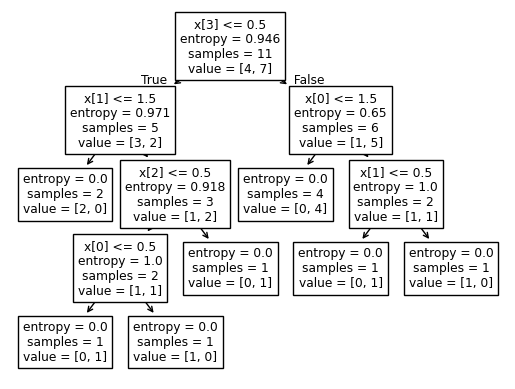

In [24]:
from sklearn import tree
tree.plot_tree(classifier)

In [25]:
clf = DecisionTreeClassifier(criterion='entropy')  # Using entropy to calculate information gain
clf.fit(x, y)
importances = clf.feature_importances_

# Create a DataFrame to see the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Information Gain': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Information Gain', ascending=False)

print(feature_importance_df)

       Feature  Information Gain
0      Outlook          0.514558
3         Wind          0.274205
2     Humidity          0.211237
1  Temperature          0.000000
